In [ ]:
!pip install -q rfdetr supervision requests Pillow matplotlib
!pip install -q "rfdetr[metrics]"

In [42]:
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA device count: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")
else:
    print("WARNING: CUDA is not available. Training will be slow on CPU.")


CUDA available: True
CUDA device count: 1
Current CUDA device: 0
CUDA device name: NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [43]:
import os
import torch
from PIL import Image
import requests
import supervision as sv
from rfdetr import RFDETRBase
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Normalize
import json

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
try:
    model = RFDETRBase(device="cuda")
except TypeError:
    print("Warning: RFDETRBase constructor does not accept 'device' argument. Trying default initialization.")
    model = RFDETRBase()

print("RF-DETR model loaded successfully.")


Using device: cuda


KeyboardInterrupt: 

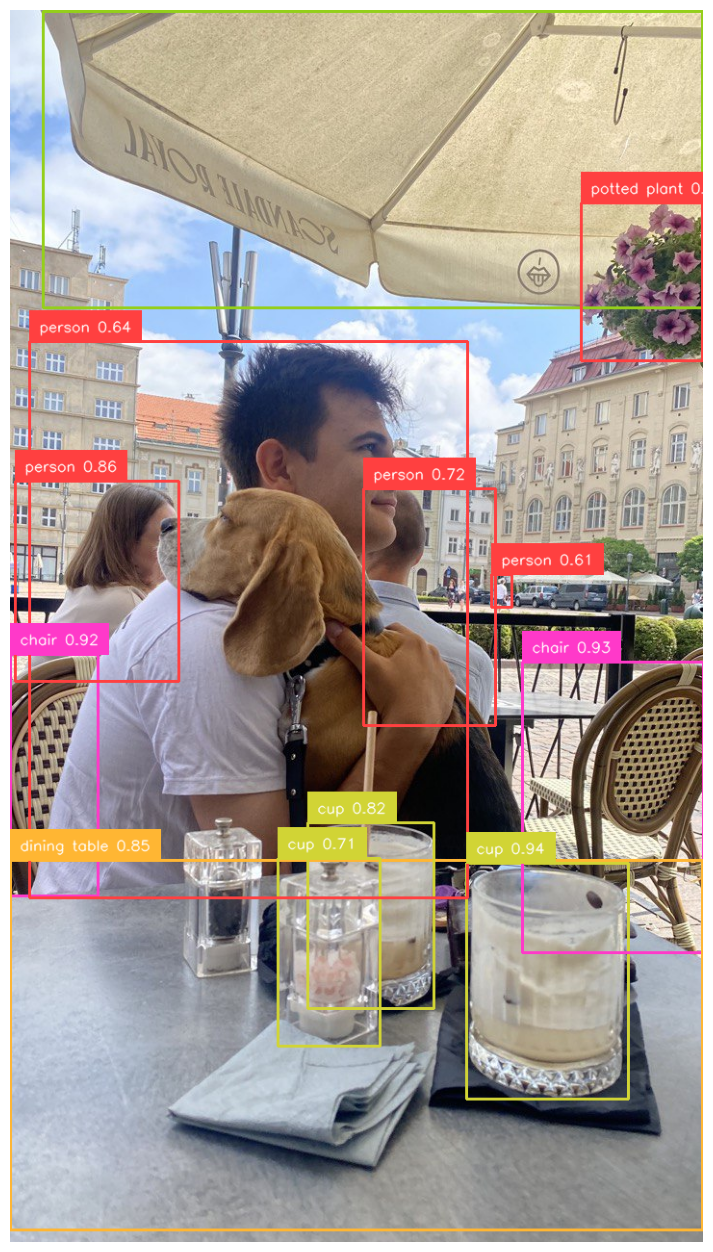

In [ ]:
# Download a sample image
image_url = "https://media.roboflow.com/notebooks/examples/dog-2.jpeg"
image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")

# Perform inference
# The `predict` method handles preprocessing internally
detections = model.predict(image, threshold=0.5)

# Visualize detections
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# RF-DETR's predict method returns class_id which is typically 0-indexed.
COCO_CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

labels = [
    f"{COCO_CLASSES[class_id]} {confidence:.2f}"
    for class_id, confidence in zip(detections.class_id, detections.confidence)
]

annotated_image = box_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(annotated_image, (16, 16))
plt.show()

Image loaded from: img2_rfdtr_test.jpg
Performing inference...
Found 3 objects.


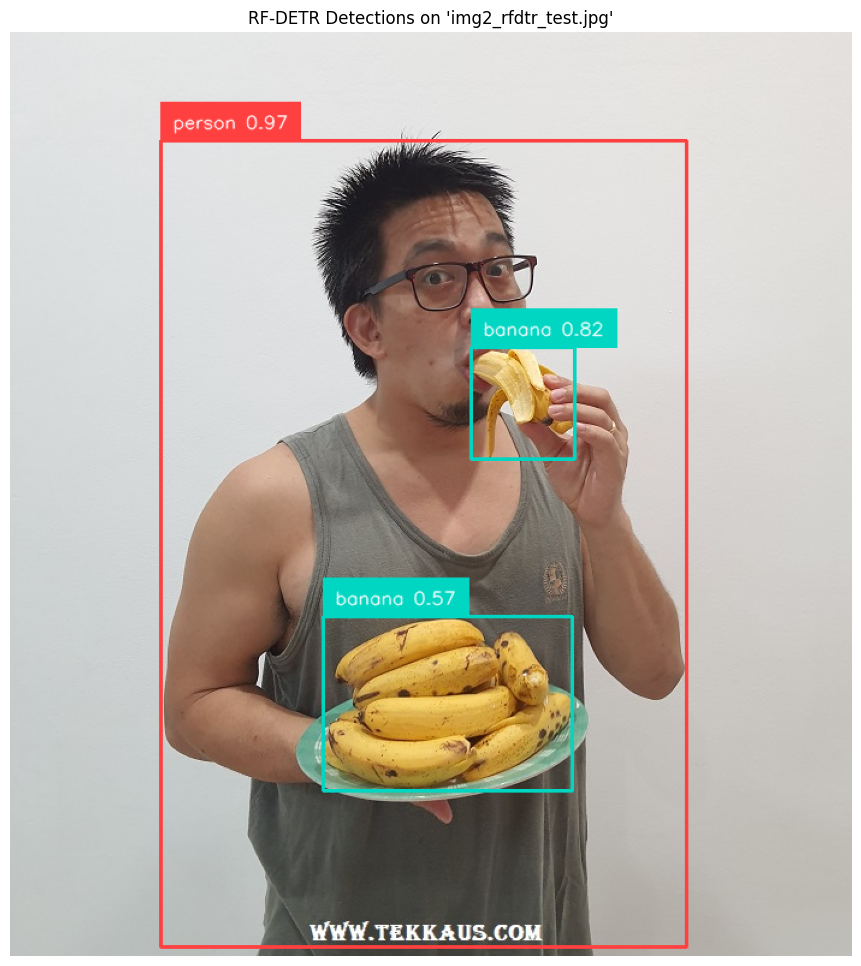

In [ ]:
my_image_path = "img2_rfdtr_test.jpg" 
try:
    image = Image.open(my_image_path).convert("RGB")
    print(f"Image loaded from: {my_image_path}")
except FileNotFoundError:
    print(f"Error: Image not found at {my_image_path}. Please check the path.")
    exit()
except Exception as e:
    print(f"Error loading image: {e}")
    exit()


print("Performing inference...")
detections = model.predict(image, threshold=0.5)

print(f"Found {len(detections.xyxy)} objects.")

class_names = COCO_CLASSES # Use COCO_CLASSES if using pre-trained COCO model

labels = []
for class_id, confidence in zip(detections.class_id, detections.confidence):
    # Ensure class_id is within bounds of class_names list
    if class_id is not None and 0 <= class_id < len(class_names):
        label_name = class_names[class_id]
    else:
        label_name = "unknown"
    labels.append(f"{label_name} {confidence:.2f}")

# Use Supervision's annotators for easy plotting.
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

# Display the annotated image
plt.figure(figsize=(12, 12)
plt.imshow(annotated_image)
plt.axis("off") # Hide axes
plt.title(f"RF-DETR Detections on '{os.path.basename(my_image_path)}'")
plt.show()


In [45]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WlEa5dWfzIfEsuLaQSUq")
project = rf.workspace("team-roboflow").project("coco-128")
version = project.version(1)
dataset = version.download("coco")
dataset_dir = "COCO-128-1" 
with open(os.path.join(dataset_dir, "train/_annotations.coco.json"), 'r') as f:
    coco_data = json.load(f)
    category_names = {cat['id']: cat['name'] for cat in coco_data['categories']}
    print(f"Detected classes: {category_names}")

Defaulting to user installation because normal site-packages is not writeable
loading Roboflow workspace...
loading Roboflow project...
Detected classes: {0: 'common-objects', 1: 'aeroplane', 2: 'backpack', 3: 'banana', 4: 'baseball bat', 5: 'baseball glove', 6: 'bear', 7: 'bed', 8: 'bench', 9: 'bicycle', 10: 'bird', 11: 'boat', 12: 'book', 13: 'bottle', 14: 'bowl', 15: 'broccoli', 16: 'bus', 17: 'cake', 18: 'car', 19: 'carrot', 20: 'cat', 21: 'cell phone', 22: 'chair', 23: 'clock', 24: 'cup', 25: 'diningtable', 26: 'dog', 27: 'donut', 28: 'elephant', 29: 'fork', 30: 'frisbee', 31: 'giraffe', 32: 'handbag', 33: 'horse', 34: 'hot dog', 35: 'kite', 36: 'knife', 37: 'laptop', 38: 'microwave', 39: 'motorbike', 40: 'mouse', 41: 'orange', 42: 'oven', 43: 'person', 44: 'pizza', 45: 'pottedplant', 46: 'refrigerator', 47: 'remote', 48: 'sandwich', 49: 'scissors', 50: 'sink', 51: 'skateboard', 52: 'skis', 53: 'snowboard', 54: 'sofa', 55: 'spoon', 56: 'sports ball', 57: 'stop sign', 58: 'suitcase

In [28]:
# Define training parameters
epochs = 5
batch_size = 8 
learning_rate = 1e-4
output_dir = "rf_detr_training_output"
os.makedirs(output_dir, exist_ok=True)

# Training with RF-DETR's built-in `train` method
history = []
def on_epoch_end_callback(data):
    history.append(data)

model.callbacks["on_fit_epoch_end"].append(on_epoch_end_callback)

print(f"Starting training on {device}...")
model.train(
    dataset_dir=dataset_dir,
    epochs=epochs,
    batch_size=batch_size,
    lr=learning_rate,
    output_dir=output_dir,
)

print("Training complete!")

num_classes mismatch: model has 90 classes, but your dataset has 72 classes
reinitializing your detection head with 72 classes.


Starting training on cuda...
TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir rf_detr_training_output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=72, grad_accum_steps=4, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=8, weight_decay=0.0001, epochs=5, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-base.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[2, 5, 8, 11], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=

fatal: not a git repository (or any of the parent directories): .git


Epoch: [0]  [0/4]  eta: 0:06:47  lr: 0.000100  class_error: 97.01  loss: 16.7277 (16.7277)  loss_ce: 0.7233 (0.7233)  loss_bbox: 1.6187 (1.6187)  loss_giou: 1.5782 (1.5782)  loss_ce_0: 0.6386 (0.6386)  loss_bbox_0: 1.8574 (1.8574)  loss_giou_0: 1.7165 (1.7165)  loss_ce_1: 0.6949 (0.6949)  loss_bbox_1: 1.6666 (1.6666)  loss_giou_1: 1.6280 (1.6280)  loss_ce_enc: 0.5242 (0.5242)  loss_bbox_enc: 2.1293 (2.1293)  loss_giou_enc: 1.9519 (1.9519)  loss_ce_unscaled: 0.7233 (0.7233)  class_error_unscaled: 97.0149 (97.0149)  loss_bbox_unscaled: 0.3237 (0.3237)  loss_giou_unscaled: 0.7891 (0.7891)  cardinality_error_unscaled: 3891.3750 (3891.3750)  loss_ce_0_unscaled: 0.6386 (0.6386)  loss_bbox_0_unscaled: 0.3715 (0.3715)  loss_giou_0_unscaled: 0.8583 (0.8583)  cardinality_error_0_unscaled: 3863.3750 (3863.3750)  loss_ce_1_unscaled: 0.6949 (0.6949)  loss_bbox_1_unscaled: 0.3333 (0.3333)  loss_giou_1_unscaled: 0.8140 (0.8140)  cardinality_error_1_unscaled: 3880.5000 (3880.5000)  loss_ce_enc_unscale

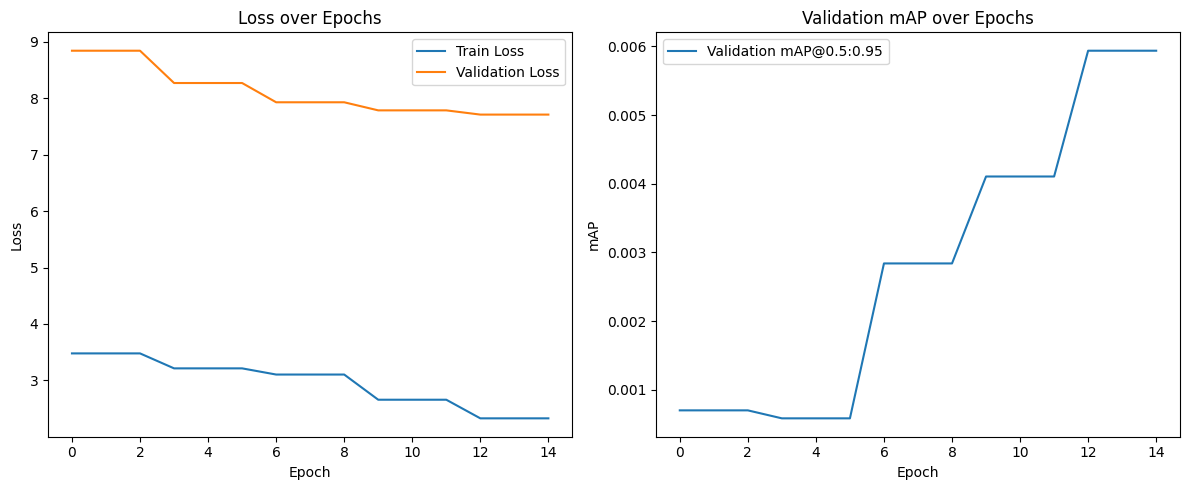

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

if history:
    df = pd.DataFrame(history)

    plt.figure(figsize=(12, 5))

    # Plot training loss
    plt.subplot(1, 2, 1)
    if 'train_loss_ce' in df.columns and 'ema_test_loss' in df.columns:
        total_train_loss = df[['train_loss_ce', 'train_loss_bbox', 'train_loss_giou']].sum(axis=1)
        plt.plot(df.index, total_train_loss, label='Train Loss')
        plt.plot(df.index, df['ema_test_loss'], label='Validation Loss')
    elif 'train_loss_ce' in df.columns:
        total_train_loss = df[['train_loss_ce', 'train_loss_bbox', 'train_loss_giou']].sum(axis=1)
        plt.plot(df.index, total_train_loss, label='Train Loss')
    else:
        print("No training or validation loss keys found.")

    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot mAP
    if 'ema_test_coco_eval_bbox' in df.columns:
        maps = [x[0] if isinstance(x, list) and len(x) > 0 else 0 for x in df['ema_test_coco_eval_bbox']]
        plt.subplot(1, 2, 2)
        plt.plot(df.index, maps, label='Validation mAP@0.5:0.95')
        plt.title('Validation mAP over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('mAP')
        plt.legend()

    plt.tight_layout()
    plt.show()

else:
    print("No training history collected. Ensure callbacks were configured correctly.")


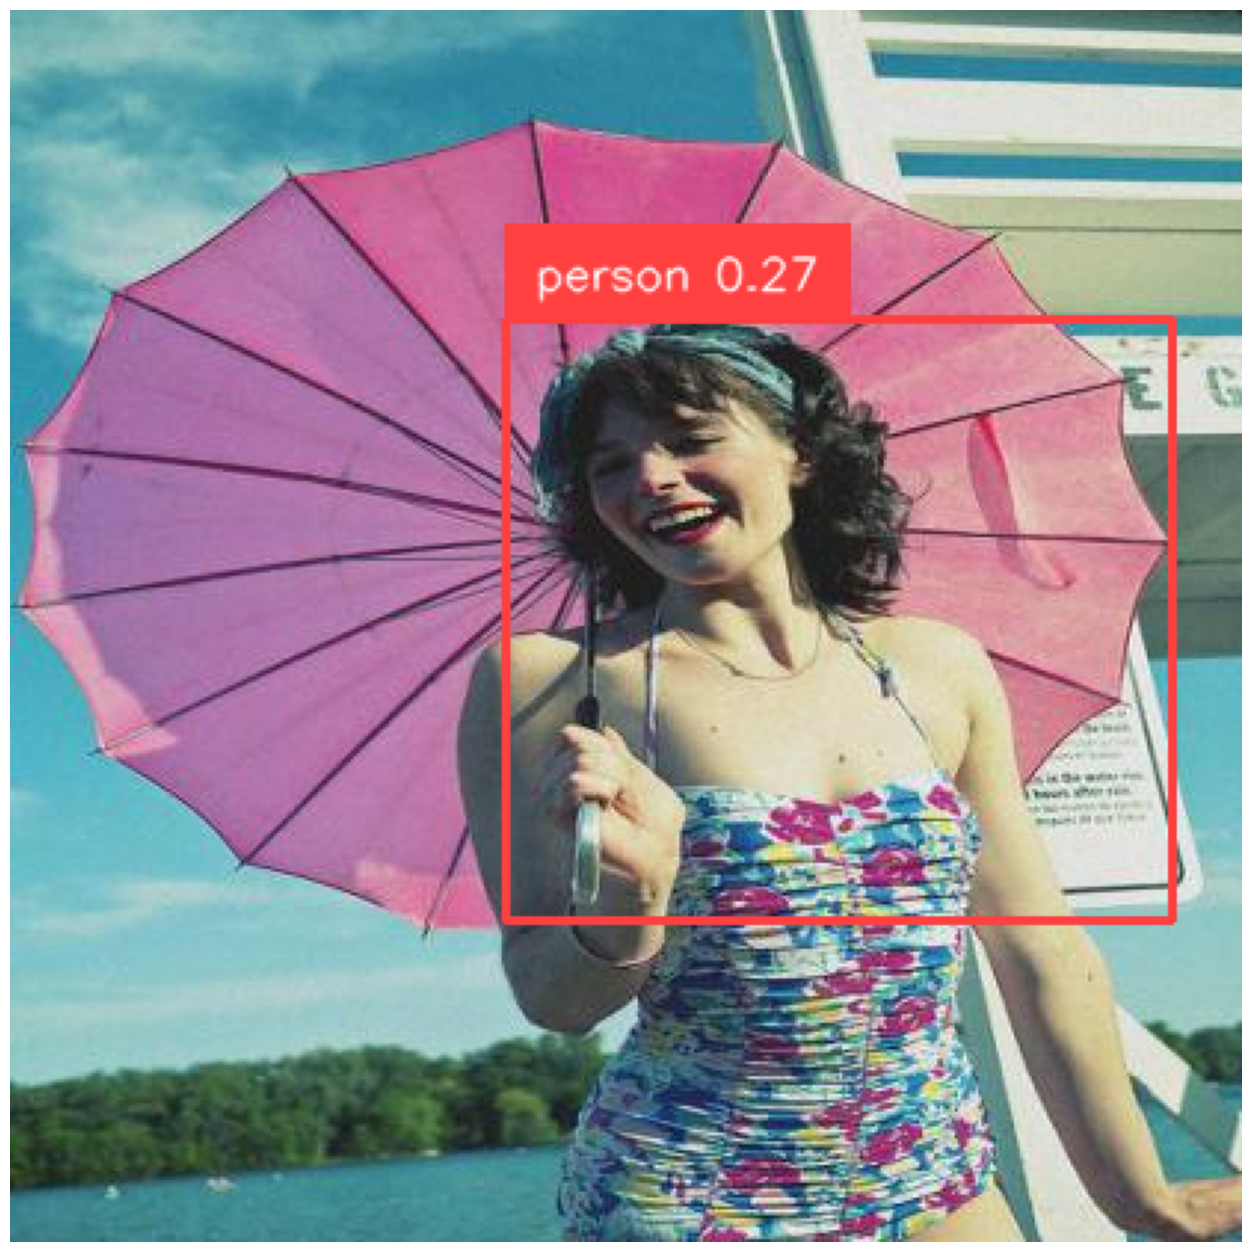

In [67]:
#Inference on a new image
new_image_path = "COCO-128-1/test/000000000036_jpg.rf.2e6ab16ffab627386b5c6eee18d9004a.jpg"
if os.path.exists(new_image_path):
    new_image = Image.open(new_image_path).convert("RGB")
    test_detections = model.predict(new_image, threshold=0.25)

    custom_class_names = [
    'common-objects', 'aeroplane', 'backpack', 'banana', 'baseball bat',
    'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat',
    'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot',
    'cat', 'cell phone', 'chair', 'clock', 'cup', 'diningtable', 'dog',
    'donut', 'elephant', 'fork', 'frisbee', 'giraffe', 'handbag', 'horse',
    'hot dog', 'kite', 'knife', 'laptop', 'microwave', 'motorbike', 'mouse',
    'orange', 'oven', 'person', 'pizza', 'pottedplant', 'refrigerator',
    'remote', 'sandwich', 'scissors', 'sink', 'skateboard', 'skis',
    'snowboard', 'sofa', 'spoon', 'sports ball', 'stop sign', 'suitcase',
    'teddy bear', 'tennis racket', 'tie', 'toilet', 'toothbrush',
    'traffic light', 'train', 'truck', 'tvmonitor', 'umbrella', 'vase',
    'wine glass', 'zebra'
]

    test_labels = [
        f"{custom_class_names[class_id]} {confidence:.2f}"
        for class_id, confidence in zip(test_detections.class_id, test_detections.confidence)
    ]

    annotated_test_image = box_annotator.annotate(scene=new_image.copy(), detections=test_detections)
    annotated_test_image = label_annotator.annotate(scene=annotated_test_image, detections=test_detections, labels=test_labels)

    sv.plot_image(annotated_test_image, (16, 16))
    plt.show()
else:
    print(f"Test image not found at {new_image_path}")

In [68]:
print(test_detections)
for cid, conf in zip(test_detections.class_id, test_detections.confidence):
    print(f"Class ID: {cid}, Confidence: {conf:.2f}, Class: {custom_class_names[cid]}")


Detections(xyxy=array([[167.83128, 104.9678 , 392.26978, 307.97723]], dtype=float32), mask=None, confidence=array([0.26875538], dtype=float32), class_id=array([43]), tracker_id=None, data={}, metadata={})
Class ID: 43, Confidence: 0.27, Class: person
